# 0. Review
## 0.A Scikit-Learn

Scikit-Learn is a machine learning python package. It allows users to access machine learning algorithms via **object-oriented programming**.

## 0.B Data Set

I will be using a dataset of avocado prices.

We would like to learn prices of avocado given brand, location sold, total volume, etc.

## 0.C Load Data

Now, we load our training and test set. Run the code below to load 

In [1]:
import pandas as pd

# load explanatory variables
avocado_training_set  = pd.read_csv("datasets/avocado_training_set",index_col=0)
avocado_training_set['year'] = avocado_training_set['year'].astype(str)
avocado_training_set['Month'] = avocado_training_set['Month'].astype(str)

avocado_test_set = pd.read_csv("datasets/avocado_test_set",index_col=0)
avocado_test_set['year'] = avocado_test_set['year'].astype(str)
avocado_test_set['Month'] = avocado_test_set['Month'].astype(str)

# load predictors
prices_training_set = pd.read_csv("datasets/avocado_prices_training_set",index_col=0)
prices_test_set = pd.read_csv("datasets/avocado_prices_test_set",index_col=0)

**In this section, we will be learning a linear regression model from our training data. Using the attributes of the avocado sold, this regression estimate the average price of the avocado.**

# 9. Train model: Linear Regression

2. Then, train a **machine learning model** using **labeled data**

    - "Labeled data" has been labeled with the outcome
    - "Machine learning model" learns the relationship between the attributes of the data and its outcome

Linear regression assumes that there is a *linear* relationship between the explanatory variables and the outcome. 

That our case linear regression means that price does up or down, but not both, at a constant rate if an explanatory variable increases.

Thus, linear regression assumes a linear model of price

$$\text{Price} = \beta_0 + \beta_1 \text{Total Volume} + \beta_2 \text{Year} + \beta_3 \text{Month} + \beta_4 \text{Type}.$$

In a linear regression model, we aim learn the coefficients, $\beta_0 ,\beta_1 ,\beta_2 ,\beta_3,\beta_4$ that minimizes the mean squared error between the model and true response variables (prices). 

That is,
$$\min_{\beta_0 ,\beta_1 ,\beta_2 ,\beta_3,\beta_4} \sum_{i=1}^{N}\left(y_i - \left(\beta_0 + \beta_1 \text{Total Volume}_i + \beta_2 \text{Year}_i + \beta_3 \text{Month}_i + \beta_4 \text{Type}_i\right)\right)^2$$

In learning a model, we will be to predict future prices and study how the explanatory variables affect price.
    
## 9.A Check Training Set

Let's check if we loaded the correct dataset.

In [2]:
#print head of labels_training_set
prices_training_set.head()

,AveragePrice
Observation 3272,1.01
Observation 8240,1.48
Observation 11769,1.63
Observation 1742,0.70
Observation 5981,0.67


In [3]:
#print head of  DNA_training_set

avocado_training_set.head()

,4046,4225,4770,Large Bags,Month,Small Bags,Total Volume,XLarge Bags,region,type,year
Observation 3272,10.080124,13.205734,11.820667,7.783766,1,11.388065,13.584884,0.000000,Chicago,conventional,2016
Observation 8240,7.364737,10.693653,4.738389,7.641209,6,9.117004,10.971312,7.107425,Syracuse,conventional,2017
Observation 11769,6.669688,2.102914,0.000000,0.000000,3,7.653338,7.974880,0.000000,Tampa,organic,2015
Observation 1742,13.412152,12.080050,8.393972,9.991916,6,11.348697,13.770007,0.000000,PhoenixTucson,conventional,2015
Observation 5981,15.198407,15.082572,12.274380,8.966972,2,15.040339,16.232638,10.843619,California,conventional,2017


## 9.B Linear Regression: Price vs. Total Volume

### 9.B.1 Plot of Price vs. Total Volume

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#scatter plot price vs. total volume
plt.figure(figsize=(15,5))
plt.scatter(avocado_training_set['Total Volume'],prices_training_set,s=5)
plt.xlabel('log(Total Volume)')
plt.ylabel('Total Price')
plt.show()

<Figure size 1500x500 with 1 Axes>

### 9.B.2 Constructing Linear Model

#### I. Initialize Linear Model Object

In [5]:
from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression(fit_intercept=True, normalize=False)

#### II. Train Linear Model Object

In [6]:
total_volume_ = avocado_training_set['Total Volume'].to_numpy().reshape(-1, 1)

linearmodel.fit(total_volume_,prices_training_set)
                

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### III.  Plotting Predicted Values

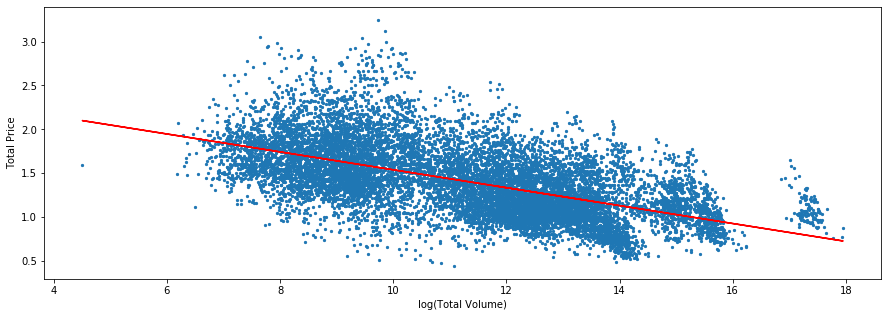

In [7]:
prices_predicted_ = linearmodel.predict(total_volume_)


#scatter plot price vs. total volume
plt.figure(figsize=(15,5))
plt.scatter(avocado_training_set['Total Volume'],prices_training_set,s=5)
plt.plot(total_volume_,prices_predicted_,c='r')

plt.xlabel('log(Total Volume)')
plt.ylabel('Total Price')
plt.show()

### 9.B.3 Getting attributes of the linear model

After being fit, LinearRegression object stores the coefficients as ```coef_``` and the intercept as ```intercept_```.

In [8]:
print(linearmodel.coef_)
print(linearmodel.intercept_)

[[-0.1021338]]
[2.55972316]


Our model is then
$$\text{Price} = 2.5597 -0.1021 \times \text{Log(Total Volume)}$$

The ```LinearRegression``` object can also compute the $R^2$ value of the model. This is computed using the ```score``` function. The score function takes the explanatory variables and response variables as arguments.

In [9]:
linearmodel.score(total_volume_,prices_training_set)

0.3396262316952716

### 9.B.4 Training Error and Test error

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
$$\text{RMSE}=\frac{1}{N}\sqrt{\sum_{i=1}^{N}(\text{true}_i - \text{pred}_i)^2}$$.


The RMSE is use to measure the fidelity of the model to training set and testing set.

#### I. Training Error

In [10]:
# training error
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(prices_training_set, prices_predicted_)))

0.32625849797815587


#### II. Testing Error

In [11]:
# format for test set error

total_volume_test_ = avocado_test_set['Total Volume'].to_numpy().reshape(-1, 1)

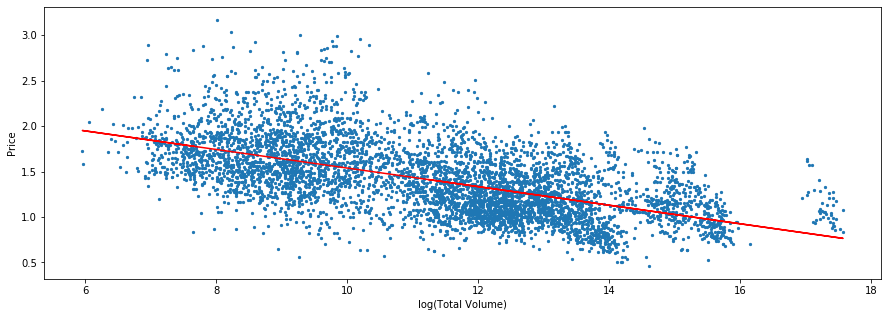

In [12]:
prices_predicted_test_ = linearmodel.predict(total_volume_test_)


#scatter plot of price vs. total volume in the test set
plt.figure(figsize=(15,5))
plt.scatter(total_volume_test_,prices_test_set,s=5)
plt.plot(total_volume_test_,prices_predicted_test_,c='r')
plt.xlabel('log(Total Volume)')
plt.ylabel('Price')
plt.show()

In [13]:
# test error

prices_predicted_test_ = linearmodel.predict(total_volume_test_)
print(np.sqrt(mean_squared_error(prices_test_set, prices_predicted_test_)))

0.32885772860332296


### 9.C Constructing Linear Model with the categorical variable, ```type```.

```Scikit-Learn``` does not handle categorical variables well.


This is a pain because we have four categorical variables:
- Month
- year
- region
- type.

In this section, we are building a linear model with the variables ```Total Volume``` and ```type```.

#### 9.C.1 Hot one encoding

For ```Scikit-Learn``` to interpret categorical variables, we have encode them into binary. 

For the explanatory variable, ```type```,  we have two categories.

In [14]:
print(avocado_training_set['type'].unique())

['conventional' 'organic']


Using the pandas method, ```get_dummies```, we encoded this as one column in which
- conventional = 0
- organic = 1.


We call this column, ```type_organic```.

In [15]:
avocado_training_set['type_organic'] = pd.get_dummies(data=avocado_training_set['type'], drop_first=True)
avocado_training_set_cleaned = avocado_training_set.drop('type',axis=1,inplace=False)

In [16]:
avocado_training_set_cleaned.head()

,4046,4225,4770,Large Bags,Month,Small Bags,Total Volume,XLarge Bags,region,year,type_organic
Observation 3272,10.080124,13.205734,11.820667,7.783766,1,11.388065,13.584884,0.000000,Chicago,2016,0
Observation 8240,7.364737,10.693653,4.738389,7.641209,6,9.117004,10.971312,7.107425,Syracuse,2017,0
Observation 11769,6.669688,2.102914,0.000000,0.000000,3,7.653338,7.974880,0.000000,Tampa,2015,1
Observation 1742,13.412152,12.080050,8.393972,9.991916,6,11.348697,13.770007,0.000000,PhoenixTucson,2015,0
Observation 5981,15.198407,15.082572,12.274380,8.966972,2,15.040339,16.232638,10.843619,California,2017,0


Repeating on the test set,

In [17]:
avocado_test_set['type_organic'] = pd.get_dummies(data=avocado_test_set['type'], drop_first=True)
avocado_test_set_cleaned = avocado_test_set.drop('type',axis=1,inplace=False)

#### 9.C.2 Model Interpretation

If run a linear model with the ```type_organic``` and log(Total Volume) columns, the linear model becomes:

$$\text{Price} = \beta_0 + \beta_1 \times \text{Log(Total Volume)} + \beta_2 \times \text{type_organic}.$$

Let's interpret this model. 

Given that the observation is an conventional avocado, $\text{type_organic} = 0$ and the linear model becomes:

$$\text{Price} = \beta_0 + \beta_1 \times \text{Log(Total Volume)} .$$


Given that the observation is an organic avocado, $\text{type_organic} = 1$ and the linear model becomes:
$$\text{Price} = \beta_0+ \beta_2 + \beta_1 \times \text{Log(Total Volume)} .$$

#### 9.C.3 Exercise: Model of Price vs organic type and log(Total Volume)

Following the steps above, create a linear model with organic type and log(Total Volume). Get the coefficients of the model and compute $R^2$ value, and the training and test error.

In [18]:
explanatory_variables  = avocado_training_set_cleaned[['Total Volume',"type_organic"]]

# enter solution here

from sklearn.linear_model import LinearRegression
linearmodel = LinearRegression(fit_intercept=True, normalize=False)
linearmodel.fit(explanatory_variables,prices_training_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print(linearmodel.coef_)
print(linearmodel.intercept_)
print(linearmodel.score(explanatory_variables,prices_training_set))

[[-0.04391177  0.33555904]]
[1.73244769]
0.40389680872557054


The model is then

$$\text{Price} = 1.7324 -0.04391 \times \text{Log(Total Volume)} + 0.3356 \times \text{type_organic}.$$


In [20]:
# get predicted test prices
predict_training_prices_ = linearmodel.predict(explanatory_variables)
print(np.sqrt(mean_squared_error(prices_training_set, predict_training_prices_)))

# test explanatory variables
test_explanatory_variables_= avocado_test_set_cleaned[['Total Volume',"type_organic"]]
predict_test_prices_ = linearmodel.predict(test_explanatory_variables_)

# get predicted test prices
print(np.sqrt(mean_squared_error(prices_test_set, predict_test_prices_)))

0.309975699740192
0.3139384759606119


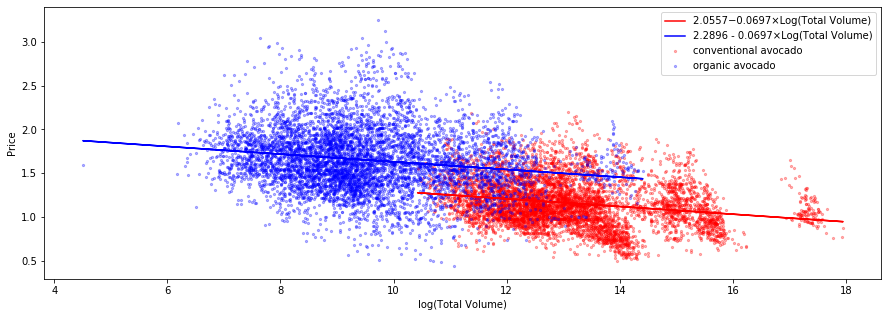

In [21]:
type_conventional = [typeo == 0 for typeo in avocado_training_set_cleaned['type_organic']]
type_organic = avocado_training_set_cleaned['type_organic'].astype(bool)

# get data for conventional avocado
training_total_volume_conventional_ = avocado_training_set_cleaned.loc[type_conventional,"Total Volume"]
training_price_conventional_ = prices_training_set[type_conventional]
predict_training_prices_conventional_ = predict_training_prices_[type_conventional]

# initialize for plot
plt.figure(figsize=(15,5))

# scatter plot of the volume for conventional avocado
plt.scatter(training_total_volume_conventional_, training_price_conventional_ ,
            s=5,alpha=0.3,color='r')
# plot of linear model for conventional avocado
plt.plot(training_total_volume_conventional_, predict_training_prices_conventional_,c='r')

# get data for organic avocado
training_total_volume_organic_ = avocado_training_set_cleaned.loc[type_organic,"Total Volume"]
training_price_organic_ = prices_training_set[type_organic]
predict_training_prices_organic_ = predict_training_prices_[type_organic]

#scatter plot of price vs. total volume in the training set for organic avocado
plt.scatter(training_total_volume_organic_, training_price_organic_,
            s=5,alpha=0.3,color='b')
# plot of linear model for organic avocado
plt.plot(training_total_volume_organic_, predict_training_prices_organic_,c='b')
plt.legend(['2.0557−0.0697×Log(Total Volume)','2.2896 - 0.0697×Log(Total Volume)',
            'conventional avocado', 'organic avocado'])
plt.xlabel('log(Total Volume)')
plt.ylabel('Price')
plt.show()

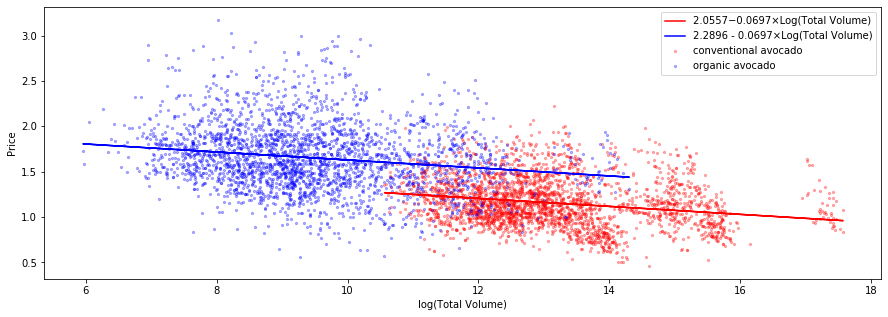

In [22]:
type_conventional = [typeo == 0 for typeo in avocado_test_set_cleaned['type_organic']]
type_organic = avocado_test_set_cleaned['type_organic'].astype(bool)

# get data for conventional avocado
test_total_volume_conventional_ = avocado_test_set_cleaned.loc[type_conventional,"Total Volume"]
test_price_conventional_ = prices_test_set[type_conventional]
predict_test_prices_conventional_ = predict_test_prices_[type_conventional]

# initialize for plot
plt.figure(figsize=(15,5))

# scatter plot of the volume for conventional avocado
plt.scatter(test_total_volume_conventional_, test_price_conventional_ ,
            s=5,alpha=0.3,color='r')
# plot of linear model for conventional avocado
plt.plot(test_total_volume_conventional_, predict_test_prices_conventional_,c='r')

# get data for organic avocado
test_total_volume_organic_ = avocado_test_set_cleaned.loc[type_organic,"Total Volume"]
test_price_organic_ = prices_test_set[type_organic]
predict_test_prices_organic_ = predict_test_prices_[type_organic]

#scatter plot of price vs. total volume in the test set for organic avocado
plt.scatter(test_total_volume_organic_, test_price_organic_,
            s=5,alpha=0.3,color='b')
# plot of linear model for organic avocado
plt.plot(test_total_volume_organic_, predict_test_prices_organic_,c='b')
plt.legend(['2.0557−0.0697×Log(Total Volume)','2.2896 - 0.0697×Log(Total Volume)',
            'conventional avocado', 'organic avocado'])
plt.xlabel('log(Total Volume)')
plt.ylabel('Price')
plt.show()

### 9.D Constructing Linear Model with the categorical variable, ```Year```.

In this section, we are building a linear model with the variables ```Total Volume``` and ```year```.

#### 9.C.1 Hot one encoding

For ```Scikit-Learn``` to interpret categorical varaibles again, we have encode them into binary. 

For the explanatory variable, ```year```,  we have four categories.

In [23]:
print(avocado_training_set['year'].unique())

['2016' '2017' '2015' '2018']


How to we hot one-encode if we have four categories? Answer: similar to above!

We build a model with addition variables, ```year_2016```, ```year_2017``` and ```year_2018```. The model is then,

$$\text{Price} = \beta_0 + \beta_1 \times \text{Log(Total Volume)} + \beta_2\times \text{year_2016} + \beta_3\times\text{year_2017} + \beta_4\times\text{year_2018},$$
where 
  $$\text{year_2016} = \begin{cases} 0 & \text{if not 2016}\\1 & \text{if 2016}  \end{cases}$$
  $$\text{year_2017} = \begin{cases} 0 & \text{if not 2017}\\1 & \text{if 2017}  \end{cases}$$
  $$\text{year_2018} = \begin{cases} 0 & \text{if not 2018}\\1 & \text{if 2018}  \end{cases}.$$

You must be wondering. What about 2015?! 

2015 is already accounted for. This is our "base" model. 

If $\text{year}$ = 2015, then the model is 
$$\text{Price} = \beta_0 + \beta_1 \times \text{Log(Total Volume)}.$$

If $\text{year}$ = 2016, then the model is 
$$\text{Price} = \beta_0 + \beta_2 + \beta_1 \times \text{Log(Total Volume)}.$$

If $\text{year}$ = 2017, then the model is 
$$\text{Price} = \beta_0 + \beta_3 + \beta_1 \times \text{Log(Total Volume)}.$$

If $\text{year}$ = 2018, then the model is 
$$\text{Price} = \beta_0 + \beta_4 + \beta_1 \times \text{Log(Total Volume)}.$$

If we were to add a column for 2015, Scikit-learn may have issues learn a linear model from data. An additional column for 2015 can create a singular data matrix for our model.

In [24]:
# split categories
avocado_year_split_ = pd.get_dummies(data=avocado_training_set['year'], drop_first=True)
avocado_year_split_.head()

,2016,2017,2018
Observation 3272,1,0,0
Observation 8240,0,1,0
Observation 11769,0,0,0
Observation 1742,0,0,0
Observation 5981,0,1,0


In [25]:
# merge data frames
avocado_training_set_cleaned = pd.concat([avocado_training_set,avocado_year_split_],
                                        axis=1, sort=False)
avocado_training_set_cleaned.head()

,4046,4225,4770,Large Bags,Month,Small Bags,Total Volume,XLarge Bags,region,type,year,type_organic,2016,2017,2018
Observation 3272,10.080124,13.205734,11.820667,7.783766,1,11.388065,13.584884,0.000000,Chicago,conventional,2016,0,1,0,0
Observation 8240,7.364737,10.693653,4.738389,7.641209,6,9.117004,10.971312,7.107425,Syracuse,conventional,2017,0,0,1,0
Observation 11769,6.669688,2.102914,0.000000,0.000000,3,7.653338,7.974880,0.000000,Tampa,organic,2015,1,0,0,0
Observation 1742,13.412152,12.080050,8.393972,9.991916,6,11.348697,13.770007,0.000000,PhoenixTucson,conventional,2015,0,0,0,0
Observation 5981,15.198407,15.082572,12.274380,8.966972,2,15.040339,16.232638,10.843619,California,conventional,2017,0,0,1,0


In [26]:
#drop year column
avocado_training_set_cleaned = avocado_training_set_cleaned.drop('year',axis=1,inplace=False)
avocado_training_set_cleaned.head()

,4046,4225,4770,Large Bags,Month,Small Bags,Total Volume,XLarge Bags,region,type,type_organic,2016,2017,2018
Observation 3272,10.080124,13.205734,11.820667,7.783766,1,11.388065,13.584884,0.000000,Chicago,conventional,0,1,0,0
Observation 8240,7.364737,10.693653,4.738389,7.641209,6,9.117004,10.971312,7.107425,Syracuse,conventional,0,0,1,0
Observation 11769,6.669688,2.102914,0.000000,0.000000,3,7.653338,7.974880,0.000000,Tampa,organic,1,0,0,0
Observation 1742,13.412152,12.080050,8.393972,9.991916,6,11.348697,13.770007,0.000000,PhoenixTucson,conventional,0,0,0,0
Observation 5981,15.198407,15.082572,12.274380,8.966972,2,15.040339,16.232638,10.843619,California,conventional,0,0,1,0


In [27]:
#current columns
avocado_training_set_cleaned.columns

Index(['4046', '4225', '4770', 'Large Bags', 'Month', 'Small Bags',
       'Total Volume', 'XLarge Bags', 'region', 'type', 'type_organic', '2016',
       '2017', '2018'],
      dtype='object')

In [28]:
# rename columns 
avocado_training_set_cleaned.rename(columns={'2016':'year_2016','2017':'year_2017','2018':'year_2018'},inplace=True)

In [29]:
#new columns
avocado_training_set_cleaned.columns

Index(['4046', '4225', '4770', 'Large Bags', 'Month', 'Small Bags',
       'Total Volume', 'XLarge Bags', 'region', 'type', 'type_organic',
       'year_2016', 'year_2017', 'year_2018'],
      dtype='object')

Doing the same with the test data,

In [30]:
# split categories
avocado_year_split_ = pd.get_dummies(data=avocado_test_set['year'], drop_first=True)

# merge data frames
avocado_test_set_cleaned = pd.concat([avocado_test_set,avocado_year_split_],
                                        axis=1, sort=False)

#drop year column
avocado_test_set_cleaned = avocado_test_set_cleaned.drop('year',axis=1,inplace=False)

# rename columns 
avocado_test_set_cleaned.rename(columns={'2016':'year_2016','2017':'year_2017','2018':'year_2018'},inplace=True)

In [31]:
avocado_test_set_cleaned.columns

Index(['4046', '4225', '4770', 'Large Bags', 'Month', 'Small Bags',
       'Total Volume', 'XLarge Bags', 'region', 'type', 'type_organic',
       'year_2016', 'year_2017', 'year_2018'],
      dtype='object')

#### 9.C.3 Exercise: Model of Price vs year and log(Total Volume)

Following the steps above, create a linear model with year and log(Total Volume). Get the coefficients of the model and compute $R^2$ value, and the training and test error.

Run the code below to plot the data and curves.

In [32]:
explanatory_variables  = avocado_training_set_cleaned[['Total Volume',"year_2016","year_2017","year_2018"]]

# enter solution here

from sklearn.linear_model import LinearRegression
linearmodel = LinearRegression(fit_intercept=True, normalize=False)
linearmodel.fit(explanatory_variables,prices_training_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print(linearmodel.coef_)
print(linearmodel.intercept_)
print(linearmodel.score(explanatory_variables,prices_training_set))

[[-0.10400937 -0.01062685  0.17673416  0.04260021]]
[2.52603409]
0.3822626777607233


The model is then, 

$$\text{Price} = 2.5260 -0.1040 \times \text{Log(Total Volume)}-0.0106 \times \text{year_2016} + 0.1767\times\text{year_2017}+ 0.04261\times\text{year_2018}.$$


This code below creates a scatter plot of the training set and plot of the linear model applied to the training set.

In [34]:
# predicted variables
predict_training_prices_ = linearmodel.predict(explanatory_variables)

# create index of variables that are 2016, 2016, 2017, 2018
year_2016 = avocado_training_set_cleaned['year_2016'].astype(bool)
year_2017 = avocado_training_set_cleaned['year_2017'].astype(bool)
year_2018 = avocado_training_set_cleaned['year_2018'].astype(bool)
year_2015 = (year_2016 == False)&(year_2017 == False)&(year_2018 == False)

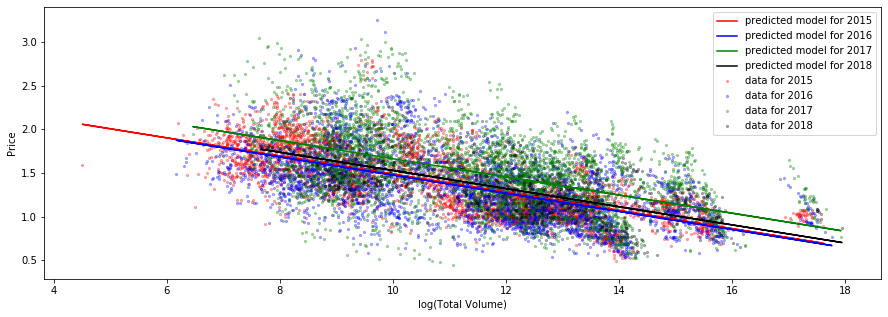

In [35]:
# initialize for plot
plt.figure(figsize=(15,5))
#initialize plot parameters
list_years = [year_2015,year_2016,year_2017,year_2018]
years = ["2015","2016","2017","2018"]
colors = ['r','b','g','k']
legend_name_scatter = []
legend_name_line = []
for i in range(4):
    indices = list_years[i]
    # get data
    training_total_volume_year_ = avocado_training_set_cleaned.loc[indices,"Total Volume"]
    training_price_year_ = prices_training_set[indices]
    predicted_training_prices_year = predict_training_prices_[indices]


    # scatter plot of the volume 
    plt.scatter(training_total_volume_year_, training_price_year_ , s=5,
                alpha=0.3,color=colors[i])
    # plot of linear model 
    plt.plot(training_total_volume_year_, predicted_training_prices_year,c=colors[i])
    legend_name_scatter.extend(['data for ' + years[i]])
    legend_name_line.extend(['predicted model for ' + years[i]])
legend_name_line.extend(legend_name_scatter)
plt.xlabel('log(Total Volume)')
plt.ylabel('Price')
plt.legend(legend_name_line)
plt.show()

This code below creates a scatter plot of the test set and plot of the linear model applied to the test set.

In [36]:
# predicted variables
explanatory_variables_test  = avocado_test_set_cleaned[['Total Volume',"year_2016","year_2017","year_2018"]]
predict_test_prices_ = linearmodel.predict(explanatory_variables_test)

# create index of variables that are 2016, 2016, 2017, 2018
year_2016 = avocado_test_set_cleaned['year_2016'].astype(bool)
year_2017 = avocado_test_set_cleaned['year_2017'].astype(bool)
year_2018 = avocado_test_set_cleaned['year_2018'].astype(bool)
year_2015 = (year_2016 == False)&(year_2017 == False)&(year_2018 == False)

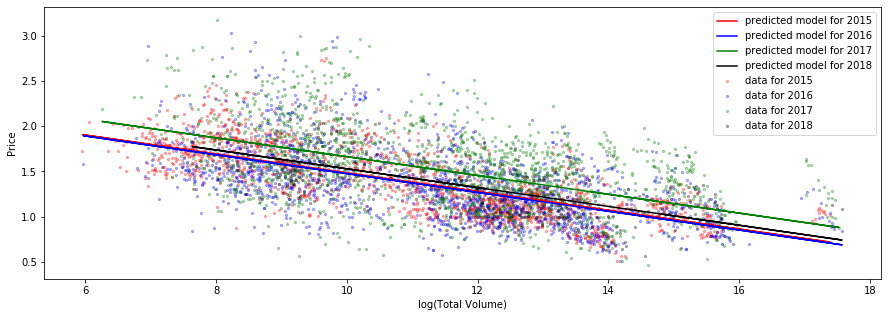

In [37]:
# initialize for plot
plt.figure(figsize=(15,5))
#initialize plot parameters
list_years = [year_2015,year_2016,year_2017,year_2018]
years = ["2015","2016","2017","2018"]
colors = ['r','b','g','k']
legend_name_scatter = []
legend_name_line = []
for i in range(4):
    indices = list_years[i]
    # get data
    test_total_volume_year_ = avocado_test_set_cleaned.loc[indices,"Total Volume"]
    test_price_year_ = prices_test_set[indices]
    predicted_test_prices_year = predict_test_prices_[indices]


    # scatter plot of the volume 
    plt.scatter(test_total_volume_year_, test_price_year_ , s=5,
                alpha=0.3,color=colors[i])
    # plot of linear model 
    plt.plot(test_total_volume_year_, predicted_test_prices_year,c=colors[i])
    legend_name_scatter.extend(['data for ' + years[i]])
    legend_name_line.extend(['predicted model for ' + years[i]])
legend_name_line.extend(legend_name_scatter)
plt.xlabel('log(Total Volume)')
plt.ylabel('Price')
plt.legend(legend_name_line)
plt.show()